In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Kyoto_Gases = pd.read_csv('Kyoto Gases.csv')

In [3]:
#Save Kyoto_Gases data (2020-2100), consider the case of C1-C8 for simplicity.
X_Emissions = Kyoto_Gases
X_Emissions = X_Emissions[X_Emissions['Category'].isin(['C1','C2','C3','C4','C5','C6','C7','C8'])]
X_Emissions.reset_index(drop=True,inplace=True)

In [4]:
#Merge models according to a uniform standard
MESSAGEix = list(set([i for i in X_Emissions['Model'] if  'MESSAGE' in i]))
WITCH = list(set([i for i in X_Emissions['Model'] if  'WITCH' in i]))
COFFEE = ['COFFEE 1.1']
REMIND = list(set([i for i in X_Emissions['Model'] if  'REM' in i]))
TIA = list(set([i for i in X_Emissions['Model'] if  'TIAM-ECN' in i]))
POL = list(set([i for i in X_Emissions['Model'] if  'POL' in i]))
AIM = list(set([i for i in X_Emissions['Model'] if  'AIM' in i]))
IMA = list(set([i for i in X_Emissions['Model'] if  'IMAGE' in i]))
GCA = list(set([i for i in X_Emissions['Model'] if  'GCA' in i]))
Model = [MESSAGEix,WITCH,COFFEE,REMIND,TIA,POL,AIM,IMA,GCA]
Model_names = ['MESSAGEix','WITCH','COFFEE','REMIND','TIA','POL','AIM','IMA','GCA']
Model_List = []
for i in Model:
    Model_List += i
X_Emissions = X_Emissions[X_Emissions['Model'].isin(Model_List)]
mapping = {j:Model_names[i] for i in range(len(Model)) for j in Model[i]}
X_Emissions['Model'].replace(mapping,inplace=True)
X_Emissions.reset_index(drop=True,inplace=True)

In [5]:
#Load a dataset of individual variables
#Get the intersection of the models and scenarios contained in each variable
CarbonSequestration = pd.read_csv('Carbon_Sequestration_CCS_imputed.csv')
FinalEnergy_Liquid = pd.read_csv('Final Energy_Liquids.csv')
PrimaryEnergy_Gas = pd.read_csv('Primary Energy_Gas.csv')
PrimaryEnergy_Oil = pd.read_csv('Primary Energy_Oil.csv')
PrimaryEnergy_Coal = pd.read_csv('PrimaryEnergy_Coal.csv')
Model_Scenario = X_Emissions[['Model','Scenario']]
Variables = [CarbonSequestration,FinalEnergy_Liquid,PrimaryEnergy_Coal,PrimaryEnergy_Gas,PrimaryEnergy_Oil]
for i in range(len(Variables)):
    Variables[i]['Model'].replace(mapping,inplace=True)
for variable in Variables:
    Model_Scenario = pd.merge(Model_Scenario,variable[['Model','Scenario']],on=['Model','Scenario'],how='inner')

In [6]:
#Take out the CarbonSequestration value at 2050
CarbonSequestration_2050 = pd.merge(Model_Scenario,Variables[0],on=['Model','Scenario'],how='inner')[['Category','2050']]

In [7]:
C1_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Category']== 'C1']['2050'].values
C2_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Category']== 'C2']['2050'].values
C3_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Category']== 'C3']['2050'].values
C4_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Category']== 'C4']['2050'].values
C5_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Category']== 'C5']['2050'].values
C6_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Category']== 'C6']['2050'].values
C7_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Category']== 'C7']['2050'].values
C8_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Category']== 'C8']['2050'].values
Data_Values = [C1_CarbonSequestration_2050,C2_CarbonSequestration_2050,C3_CarbonSequestration_2050,C4_CarbonSequestration_2050,C5_CarbonSequestration_2050,C6_CarbonSequestration_2050,C7_CarbonSequestration_2050,C8_CarbonSequestration_2050]

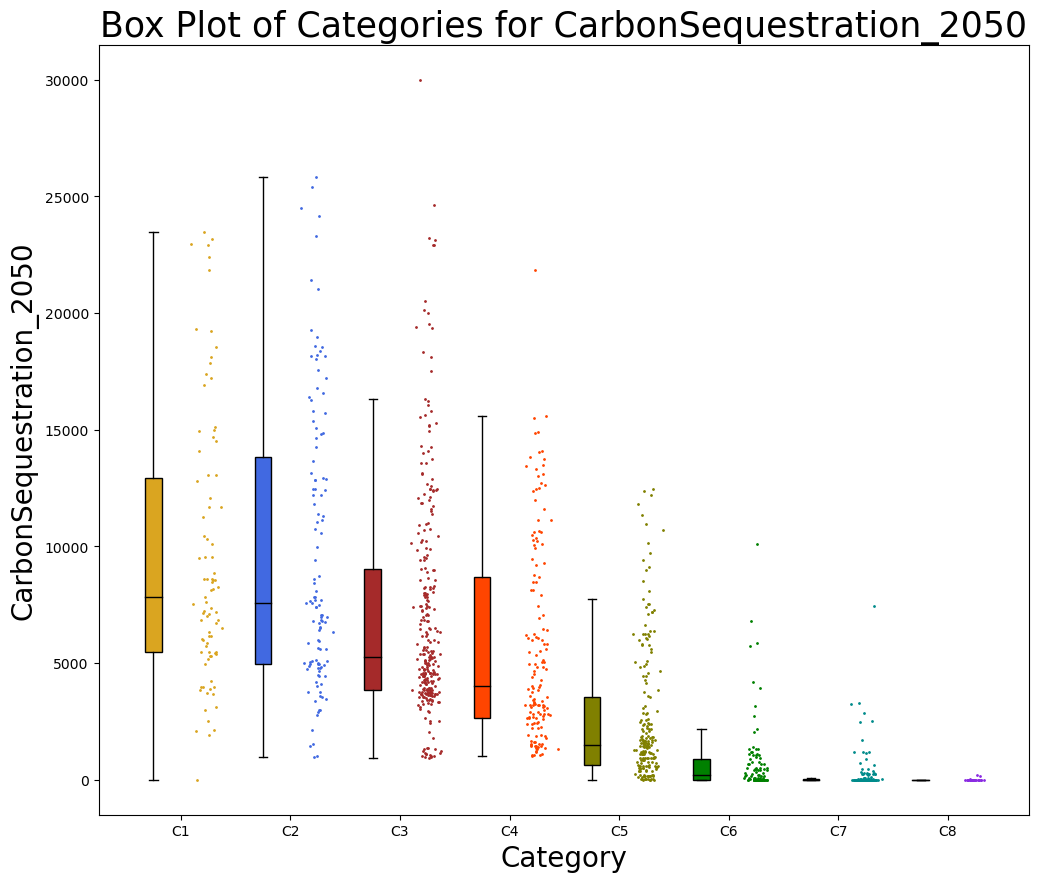

In [8]:
Category_names = ['C1','C2','C3','C4','C5','C6','C7','C8']
import seaborn as sns
box_positions = np.arange(1, len(Category_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Category_names) + 1) + 0.25

colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.xlabel('Category',fontsize=20)
plt.ylabel('CarbonSequestration_2050',fontsize=20)
plt.title('Box Plot of Categories for CarbonSequestration_2050',fontsize=25)
# Set scale
plt.xticks(range(1, len(Category_names) + 1), Category_names)
#plt.savefig('Box Plot of Categories(C1-C8) for CarbonSequestration_2050.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [9]:
#Take out the CarbonSequestration value of each model at 2100
CarbonSequestration_2100 = pd.merge(Model_Scenario,Variables[0],on=['Model','Scenario'],how='inner')[['Category','2100']]
C1_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Category']== 'C1']['2100'].values
C2_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Category']== 'C2']['2100'].values
C3_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Category']== 'C3']['2100'].values
C4_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Category']== 'C4']['2100'].values
C5_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Category']== 'C5']['2100'].values
C6_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Category']== 'C6']['2100'].values
C7_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Category']== 'C7']['2100'].values
C8_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Category']== 'C8']['2100'].values
Data_Values = [C1_CarbonSequestration_2100,C2_CarbonSequestration_2100,C3_CarbonSequestration_2100,C4_CarbonSequestration_2100,C5_CarbonSequestration_2100,C6_CarbonSequestration_2100,C7_CarbonSequestration_2100,C8_CarbonSequestration_2100]

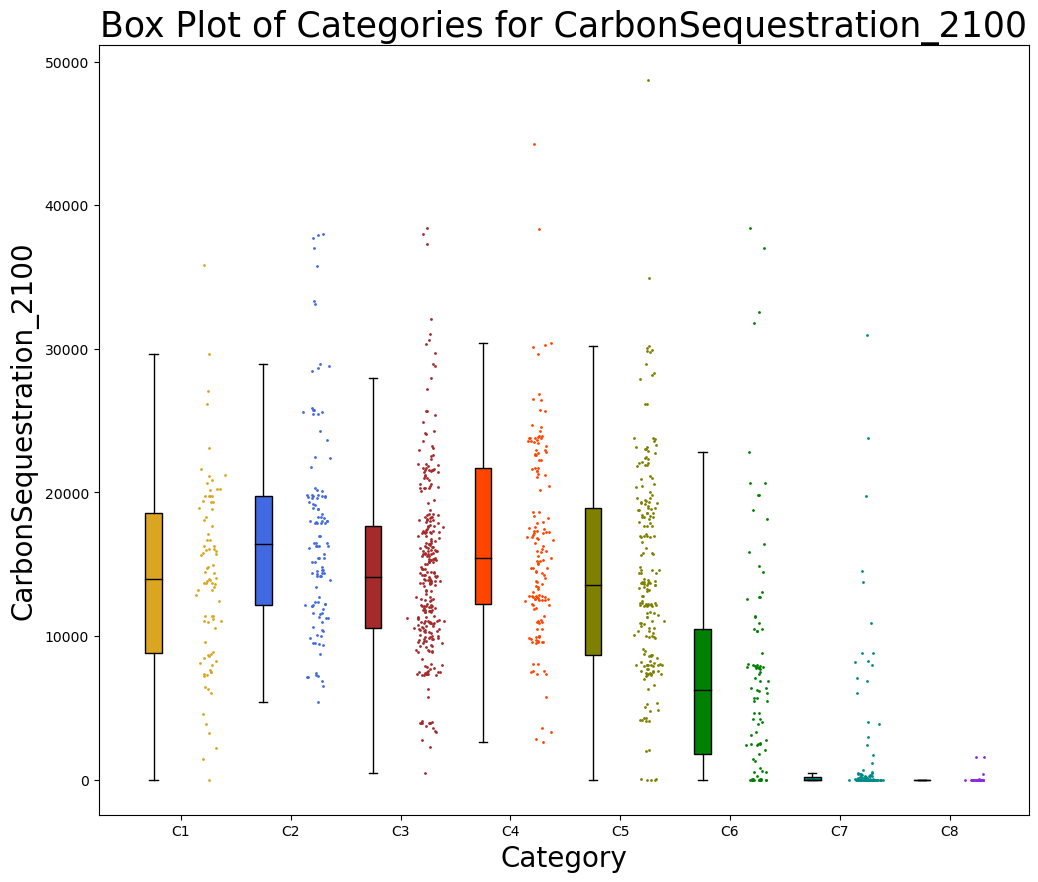

In [10]:
import seaborn as sns
box_positions = np.arange(1, len(Category_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Category_names) + 1) + 0.25

colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.xlabel('Category',fontsize=20)
plt.ylabel('CarbonSequestration_2100',fontsize=20)
plt.title('Box Plot of Categories for CarbonSequestration_2100',fontsize=25)
# Set the horizontal axis scale label
plt.xticks(range(1, len(Category_names) + 1), Category_names)
#plt.savefig('Box Plot of Categories(C1-C8) for CarbonSequestration_2100.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [11]:
#Take the PrimaryEnergy_Coal values of each model at 2050
PrimaryEnergy_Coal_2050 = pd.merge(Model_Scenario,Variables[2],on=['Model','Scenario'],how='inner')[['Category','2050']]

In [12]:
C1_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Category']== 'C1']['2050'].values
C2_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Category']== 'C2']['2050'].values
C3_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Category']== 'C3']['2050'].values
C4_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Category']== 'C4']['2050'].values
C5_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Category']== 'C5']['2050'].values
C6_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Category']== 'C6']['2050'].values
C7_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Category']== 'C7']['2050'].values
C8_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Category']== 'C8']['2050'].values
Data_Values = [C1_PrimaryEnergy_Coal_2050,C2_PrimaryEnergy_Coal_2050,C3_PrimaryEnergy_Coal_2050,C4_PrimaryEnergy_Coal_2050,C5_PrimaryEnergy_Coal_2050,C6_PrimaryEnergy_Coal_2050,C7_PrimaryEnergy_Coal_2050,C8_PrimaryEnergy_Coal_2050]

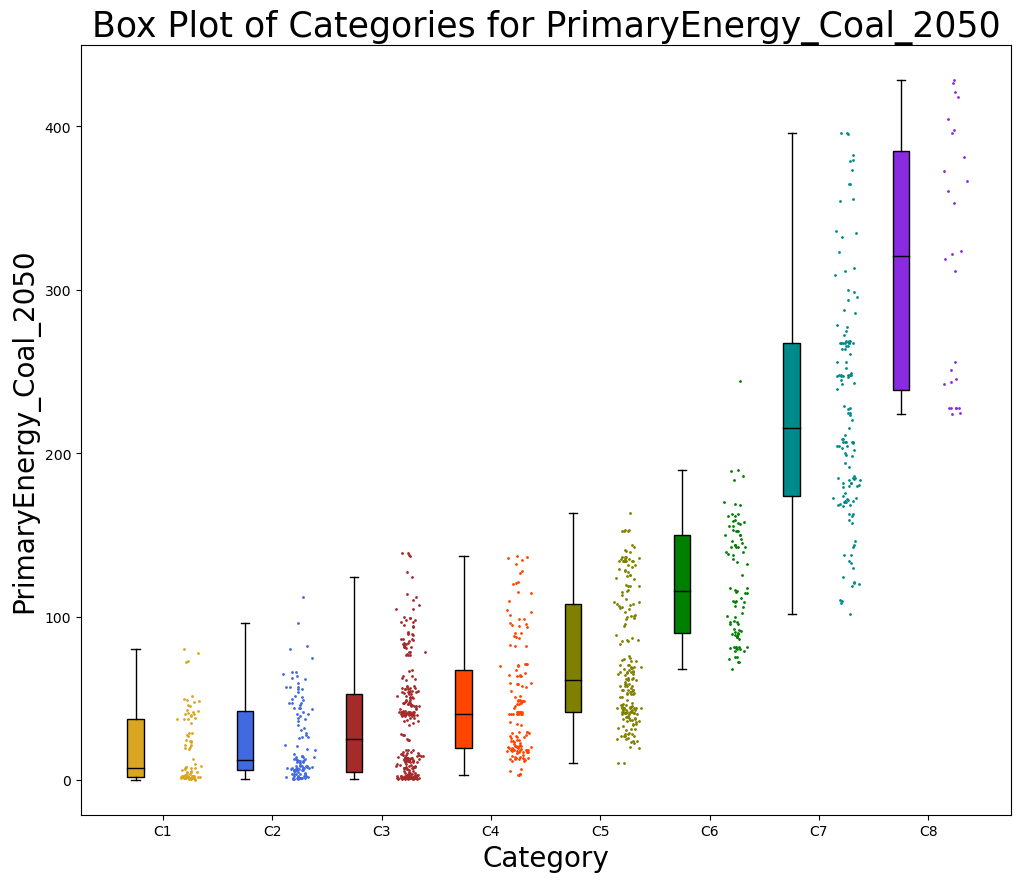

In [13]:
box_positions = np.arange(1, len(Category_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Category_names) + 1) + 0.25

colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.xlabel('Category',fontsize=20)
plt.ylabel('PrimaryEnergy_Coal_2050',fontsize=20)
plt.title('Box Plot of Categories for PrimaryEnergy_Coal_2050',fontsize=25)
#Set the horizontal axis scale label
plt.xticks(range(1, len(Category_names) + 1), Category_names)
#plt.savefig('Box Plot of Categories(C1-C8) for PrimaryEnergy_Coal_2050.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [14]:
#Get the PrimaryEnergy_Coal values of each model at 2100
PrimaryEnergy_Coal_2100 = pd.merge(Model_Scenario,Variables[2],on=['Model','Scenario'],how='inner')[['Category','2100']]
C1_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Category']== 'C1']['2100'].values
C2_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Category']== 'C2']['2100'].values
C3_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Category']== 'C3']['2100'].values
C4_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Category']== 'C4']['2100'].values
C5_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Category']== 'C5']['2100'].values
C6_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Category']== 'C6']['2100'].values
C7_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Category']== 'C7']['2100'].values
C8_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Category']== 'C8']['2100'].values
Data_Values = [C1_PrimaryEnergy_Coal_2100,C2_PrimaryEnergy_Coal_2100,C3_PrimaryEnergy_Coal_2100,C4_PrimaryEnergy_Coal_2100,C5_PrimaryEnergy_Coal_2100,C6_PrimaryEnergy_Coal_2100,C7_PrimaryEnergy_Coal_2100,C8_PrimaryEnergy_Coal_2100]

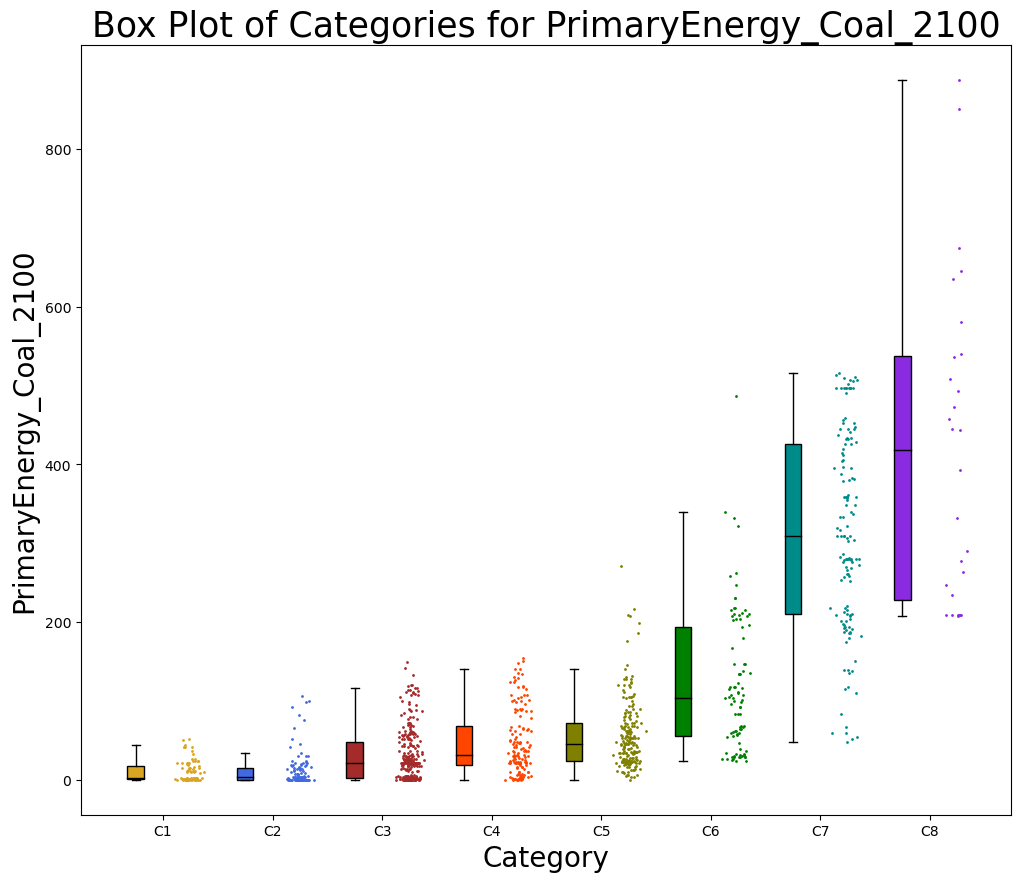

In [15]:
box_positions = np.arange(1, len(Category_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Category_names) + 1) + 0.25

colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.xlabel('Category',fontsize=20)
plt.ylabel('PrimaryEnergy_Coal_2100',fontsize=20)
plt.title('Box Plot of Categories for PrimaryEnergy_Coal_2100',fontsize=25)
#Set the horizontal axis scale label
plt.xticks(range(1, len(Category_names) + 1), Category_names)
#plt.savefig('Box Plot of Categories(C1-C8) for PrimaryEnergy_Coal_2100.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [16]:
#Take out the CarbonSequestration value of each variable at 2050 (Agg-Category)
CarbonSequestration_2050 = pd.merge(Model_Scenario,Variables[0],on=['Model','Scenario'],how='inner')[['Category','2050']]
mapping = {'C1':'C1234','C2':'C1234','C3':'C1234','C4':'C1234','C5':'C56','C6':'C56','C7':'C78','C8':'C78'}
CarbonSequestration_2050['Category'].replace(mapping,inplace=True)
Category_names = ['C1234','C56','C78']

In [17]:
C1234_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Category']== 'C1234']['2050'].values
C56_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Category']== 'C56']['2050'].values
C78_CarbonSequestration_2050 = CarbonSequestration_2050[CarbonSequestration_2050['Category']== 'C78']['2050'].values
Data_Values = [C1234_CarbonSequestration_2050,C56_CarbonSequestration_2050,C78_CarbonSequestration_2050]

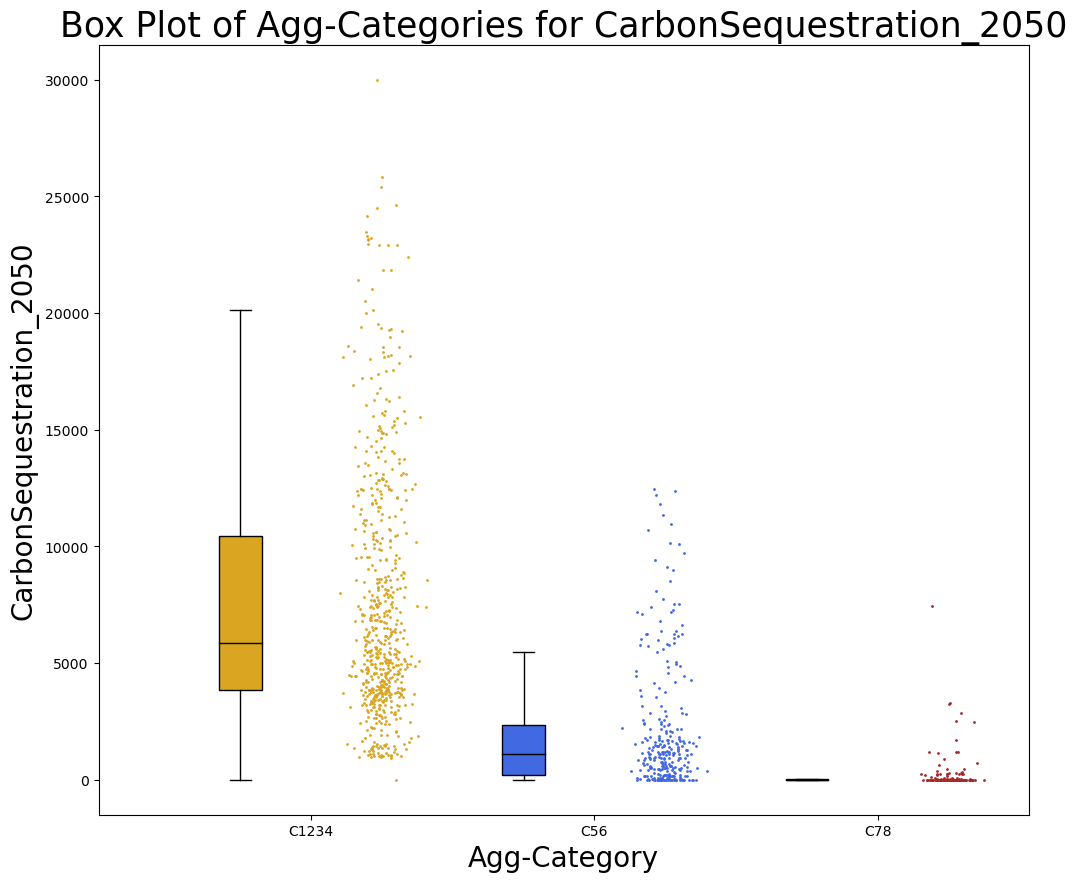

In [18]:
box_positions = np.arange(1, len(Category_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Category_names) + 1) + 0.25

colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.xlabel('Agg-Category',fontsize=20)
plt.ylabel('CarbonSequestration_2050',fontsize=20)
plt.title('Box Plot of Agg-Categories for CarbonSequestration_2050',fontsize=25)
#Set the horizontal axis scale label
plt.xticks(range(1, len(Category_names) + 1), Category_names)
#plt.savefig('Box Plot of Agg-Categories for CarbonSequestration_2050.pdf',format='pdf',bbox_inches='tight')
plt.show()

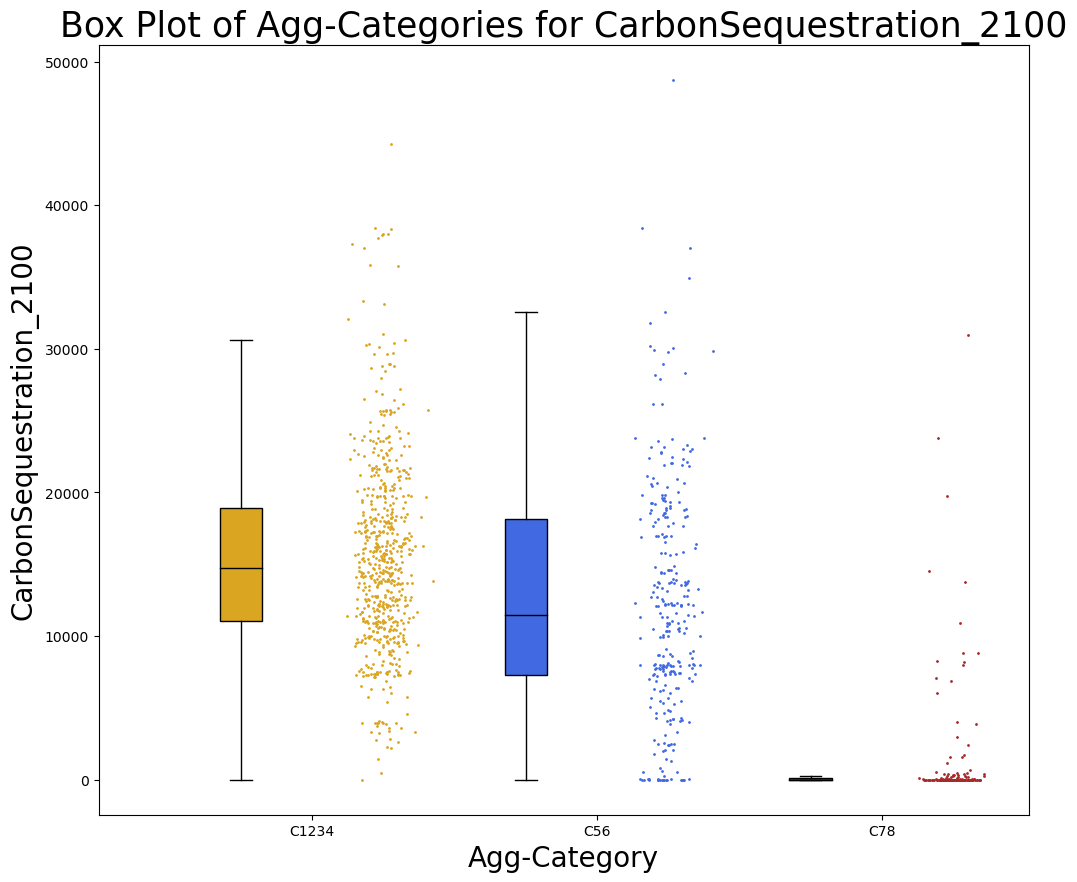

In [19]:
#Get the CarbonSequestration value of each variable at 2100 (Agg-Category)
CarbonSequestration_2100 = pd.merge(Model_Scenario,Variables[0],on=['Model','Scenario'],how='inner')[['Category','2100']]
mapping = {'C1':'C1234','C2':'C1234','C3':'C1234','C4':'C1234','C5':'C56','C6':'C56','C7':'C78','C8':'C78'}
CarbonSequestration_2100['Category'].replace(mapping,inplace=True)
C1234_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Category']== 'C1234']['2100'].values
C56_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Category']== 'C56']['2100'].values
C78_CarbonSequestration_2100 = CarbonSequestration_2100[CarbonSequestration_2100['Category']== 'C78']['2100'].values
Data_Values = [C1234_CarbonSequestration_2100,C56_CarbonSequestration_2100,C78_CarbonSequestration_2100]


box_positions = np.arange(1, len(Category_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Category_names) + 1) + 0.25

colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.xlabel('Agg-Category',fontsize=20)
plt.ylabel('CarbonSequestration_2100',fontsize=20)
plt.title('Box Plot of Agg-Categories for CarbonSequestration_2100',fontsize=25)
#Set the horizontal axis scale label
plt.xticks(range(1, len(Category_names) + 1), Category_names)
plt.savefig('Box Plot of Agg-Categories for CarbonSequestration_2100.pdf',format='pdf',bbox_inches='tight')
plt.show()

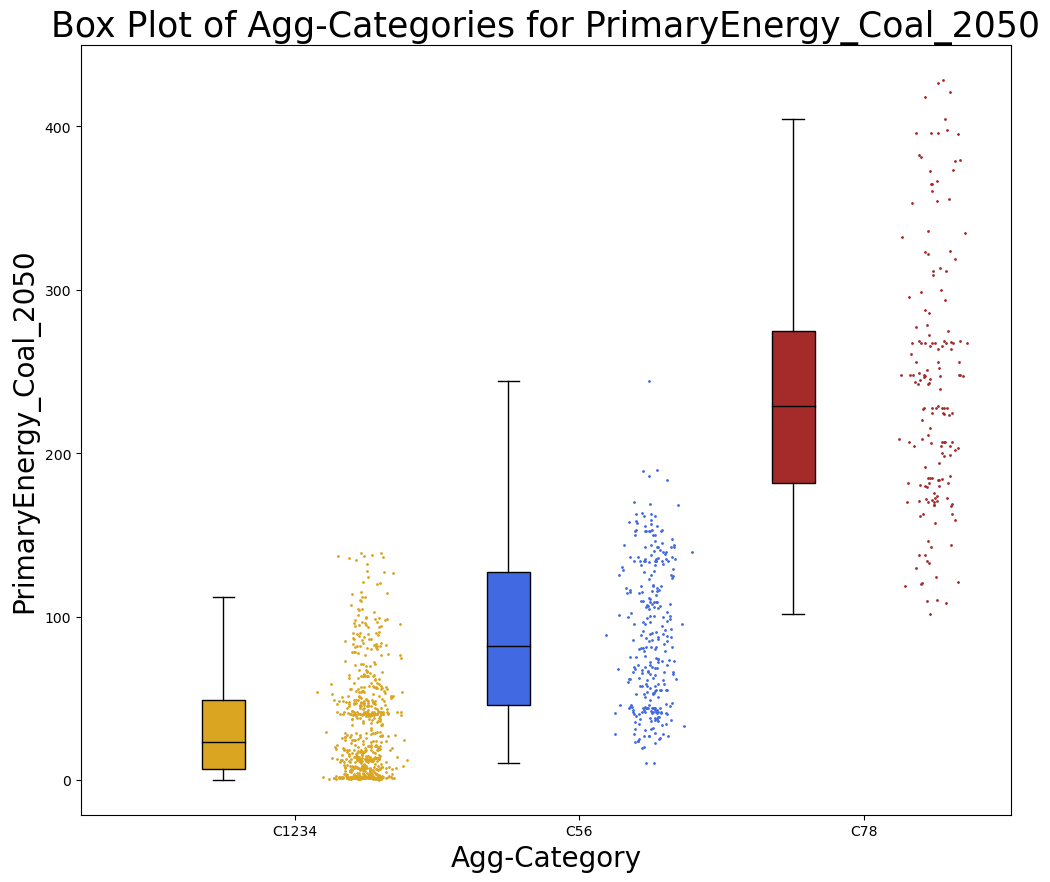

In [20]:
#Get the PrimaryEnergy_Coal value of each variable at 2050 (Agg-Category)
PrimaryEnergy_Coal_2050 = pd.merge(Model_Scenario,Variables[2],on=['Model','Scenario'],how='inner')[['Category','2050']]
mapping = {'C1':'C1234','C2':'C1234','C3':'C1234','C4':'C1234','C5':'C56','C6':'C56','C7':'C78','C8':'C78'}
PrimaryEnergy_Coal_2050['Category'].replace(mapping,inplace=True)
C1234_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Category']== 'C1234']['2050'].values
C56_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Category']== 'C56']['2050'].values
C78_PrimaryEnergy_Coal_2050 = PrimaryEnergy_Coal_2050[PrimaryEnergy_Coal_2050['Category']== 'C78']['2050'].values

Data_Values = [C1234_PrimaryEnergy_Coal_2050,C56_PrimaryEnergy_Coal_2050,C78_PrimaryEnergy_Coal_2050]


box_positions = np.arange(1, len(Category_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Category_names) + 1) + 0.25

colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.xlabel('Agg-Category',fontsize=20)
plt.ylabel('PrimaryEnergy_Coal_2050',fontsize=20)
plt.title('Box Plot of Agg-Categories for PrimaryEnergy_Coal_2050',fontsize=25)
#Set the horizontal axis scale label
plt.xticks(range(1, len(Category_names) + 1), Category_names)
#plt.savefig('Box Plot of Agg-Categories for PrimaryEnergy_Coal_2050.pdf',format='pdf',bbox_inches='tight')
plt.show()

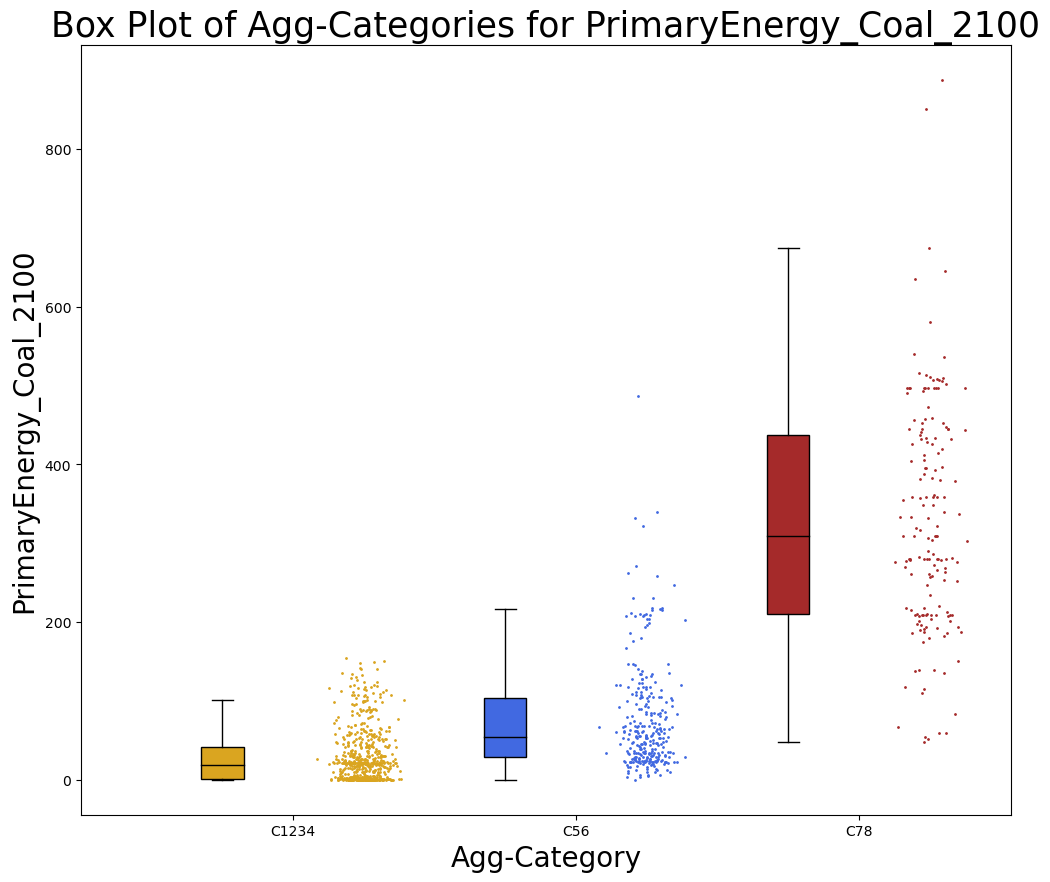

In [21]:
#Get the PrimaryEnergy_Coal value of each variable at 2100 (Agg-Category)
PrimaryEnergy_Coal_2100 = pd.merge(Model_Scenario,Variables[2],on=['Model','Scenario'],how='inner')[['Category','2100']]
mapping = {'C1':'C1234','C2':'C1234','C3':'C1234','C4':'C1234','C5':'C56','C6':'C56','C7':'C78','C8':'C78'}
PrimaryEnergy_Coal_2100['Category'].replace(mapping,inplace=True)
C1234_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Category']== 'C1234']['2100'].values
C56_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Category']== 'C56']['2100'].values
C78_PrimaryEnergy_Coal_2100 = PrimaryEnergy_Coal_2100[PrimaryEnergy_Coal_2100['Category']== 'C78']['2100'].values
Data_Values = [C1234_PrimaryEnergy_Coal_2100,C56_PrimaryEnergy_Coal_2100,C78_PrimaryEnergy_Coal_2100]


box_positions = np.arange(1, len(Category_names) + 1) - 0.25
scatter_positions = np.arange(1, len(Category_names) + 1) + 0.25

colors = ['goldenrod','royalblue','brown','orangered','olive','green','darkcyan','blueviolet']
plt.figure(figsize=(12,10))
box_plot = plt.boxplot(Data_Values,showfliers=False,patch_artist=True,widths=0.15,positions=box_positions)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
for median_line in box_plot['medians']:
    median_line.set(color='black')
# scatterplot
for i, data in enumerate(Data_Values):
    x = np.random.normal(scatter_positions[i], 0.05, size=len(data))
    plt.scatter(x, data, color=colors[i], s=1)
plt.xlabel('Agg-Category',fontsize=20)
plt.ylabel('PrimaryEnergy_Coal_2100',fontsize=20)
plt.title('Box Plot of Agg-Categories for PrimaryEnergy_Coal_2100',fontsize=25)
#Set the horizontal axis scale label
plt.xticks(range(1, len(Category_names) + 1), Category_names)
#plt.savefig('Box Plot of Agg-Categories for PrimaryEnergy_Coal_2100.pdf',format='pdf',bbox_inches='tight')
plt.show()